# Homework 3
## DSE 220: Machine Learning
## Due Date: 14 May 2017
## Orysya Stus

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2. Discriminative Learning
For the questions in this section, load the wine dataset (wine original.csv).

In [2]:
wine = pd.read_csv('wine_original.csv')
print(wine.shape)
wine.head()

(178, 14)


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Question 1: 
Perform a 80-20 split using train test split on the data to obtain the train and the test data (random state=3). Use Logistic Regression to classify the wines according to their cultivators. Tune parameters 'penalty' and 'C' using GridSearchCV implementation. Report the accuracy on test data.

In [3]:
y = np.array(wine['class'])
X = np.array(wine.iloc[:, 1:])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameters = {'penalty' : ['l1', 'l2'], 'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10]}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, verbose = True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
print('Test accuracy = ' + str(accuracy_score(y_pred, y_test)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'C': 1, 'penalty': 'l1'}
Test accuracy = 0.888888888889


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.6s finished


## 3. Perceptron and Support Vector Machines
## 3.1 Data:
In this section, we will work on the text data. Download the newsgroups data (train and test) using fetch 20newsgroups for categories: 'alt.atheism', 'comp.graphics', 'sci.space' and 'talk.politics.mideast' after removing 'headers', 'footers' and 'quotes' from the data. Convert all the words in the text to lower case. A common practice is to remove the stopwords like a, and, the etc. from the text. Use nltk to get the stopwords list (nltk.corpus.stopwords) and remove the stopwords from the text. Use TfidfVectorizer to obtain the tfidf vectors (after smoothing*) for the train and test data and select only top 2000 features (words). You can also perform the above stated actions (lowercase and stop-words) using the TfidfVectorizer. Note: You'll fit the tf-idf vectors on the train data and use the same to transform the test data.

*: Smoothing the text data is same as computing the idf values after adding a document with all words in the vocabulary.

In [6]:
from sklearn.datasets import fetch_20newsgroups
cats = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast']
rm = ('headers', 'footers', 'quotes')
train_all = fetch_20newsgroups(subset = 'train', categories=cats, remove=rm)
test_all = fetch_20newsgroups(subset = 'test', categories=cats, remove=rm)

In [7]:
X_train = train_all.data
y_train = train_all.target
X_test = test_all.data
y_test = test_all.target

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(strip_accents='unicode', lowercase=True, decode_error='ignore', max_features=2000, stop_words='english')
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)
print('X train vector shape', X_train_vec.shape)
print('X test vector shape', X_test_vec.shape)

X train vector shape (2221, 2000)
X test vector shape (1478, 2000)


In [9]:
# from nltk.corpus import stopwords
# import string
# def preprocess(data):
#     processed_data = []
#     for i in range(len(data)):
#         translator = str.maketrans('', '', string.punctuation)
#         a = data[i]
#         a = a.translate(translator)
#         a.replace('\n', '')
#         a = a.split()
#         b = [c.lower() for c in a]
#         filtered_words = [word for word in b if word not in stopwords.words('english')]
#         processed_data.append(filtered_words)
#     return processed_data

### Question 2: 
After obtaining the tf-idf vectors for train and test data, use the perceptron model (no penalty) to train on the training vectors and compute the accuracy on the test vectors.

In [10]:
from sklearn.linear_model import Perceptron
clf = Perceptron(penalty=None)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
print('Test accuracy = ' + str(accuracy_score(y_pred, y_test)))

Test accuracy = 0.776048714479


### Question 3: 
Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a perceptron model. Report and plot the results.

Test accuracy for top_features =  100 is  0.608930987821
Test accuracy for top_features =  200 is  0.676589986468
Test accuracy for top_features =  500 is  0.731393775372
Test accuracy for top_features =  1000 is  0.736806495264
Test accuracy for top_features =  1500 is  0.73951285521
Test accuracy for top_features =  2000 is  0.776048714479
Test accuracy for top_features =  3000 is  0.786197564276


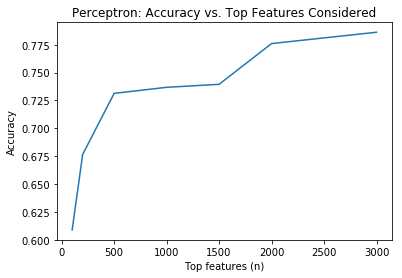

In [11]:
acc = []
top_features = [100, 200, 500, 1000, 1500, 2000, 3000]
for i in top_features:
    vec = TfidfVectorizer(strip_accents='unicode', lowercase=True, decode_error='ignore', max_features=i, stop_words='english')
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    clf = Perceptron(penalty=None)
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_pred, y_test)
    acc.append(accuracy)
    print('Test accuracy for top_features = ', i, 'is ', accuracy)
    
plot(top_features, acc)
plt.title('Perceptron: Accuracy vs. Top Features Considered');
plt.xlabel('Top features (n)');
plt.ylabel('Accuracy');

### Question 4: 
After obtaining the tf-idf vectors for train and test data, use the SVM model to train on the training vectors and compute the accuracy on the test vectors. Use linear kernel and default parameters.

In [12]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
print('Test accuracy = ' + str(accuracy_score(y_pred, y_test)))

Test accuracy = 0.814614343708


### Question 5: 
Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a linear SVM model. Report and plot the results.

Test accuracy for top_features =  100 is  0.655615696888
Test accuracy for top_features =  200 is  0.713802435724
Test accuracy for top_features =  500 is  0.745602165088
Test accuracy for top_features =  1000 is  0.767929634641
Test accuracy for top_features =  1500 is  0.777401894452
Test accuracy for top_features =  2000 is  0.794316644114
Test accuracy for top_features =  3000 is  0.814614343708


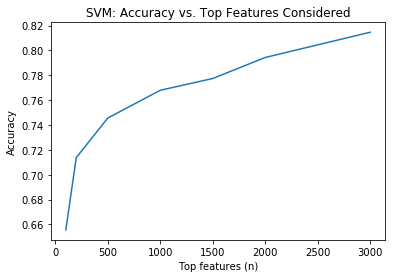

In [13]:
acc = []
top_features = [100, 200, 500, 1000, 1500, 2000, 3000]
for i in top_features:
    vec = TfidfVectorizer(strip_accents='unicode', lowercase=True, decode_error='ignore', max_features=i, stop_words='english')
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    clf = SVC(kernel='linear')
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_pred, y_test)
    acc.append(accuracy)
    print('Test accuracy for top_features = ', i, 'is ', accuracy)
    
plot(top_features, acc)
plt.title('SVM: Accuracy vs. Top Features Considered');
plt.xlabel('Top features (n)');
plt.ylabel('Accuracy');

### Question 6: 
Perform 80-20 split of the training data to obtain validation data using train test split (random state=10). Use this validation data to tune the cost parameter 'C' for values 0.01,0.1,1,10,100. Select the best value compute the accuracy for the test data. Report the validation and test accuracies. Note: Use full data of 2000 vectors here.

In [14]:
X_train_vec1, X_valid_vec, y_train1, y_valid = train_test_split(X_train_vec, y_train, test_size = 0.2, random_state=10)

The validation accuracy for C =  0.01 is  0.244943820225
The validation accuracy for C =  0.1 is  0.734831460674
The validation accuracy for C =  1 is  0.860674157303
The validation accuracy for C =  10 is  0.83595505618
The validation accuracy for C =  100 is  0.822471910112
The best C is 1 with a validation accuracy of 0.860674157303


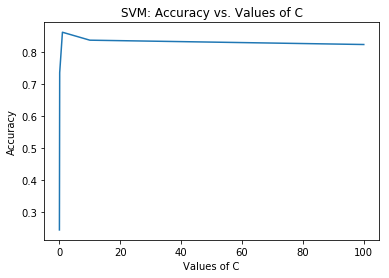

In [15]:
best_acc = 0.0
acc = []
C = [0.01,0.1,1,10,100]
for i in C:
    clf = SVC(kernel='linear', C= i)
    clf.fit(X_train_vec1, y_train1)
    y_pred = clf.predict(X_valid_vec)
    accuracy = accuracy_score(y_pred, y_valid)
    print('The validation accuracy for C = ', i, 'is ', accuracy)
    acc.append(accuracy)
    if (accuracy > best_acc):
        best_C = i
        best_acc = accuracy
print('The best C is', best_C, 'with a validation accuracy of', best_acc)

plot(C, acc);
plt.title('SVM: Accuracy vs. Values of C');
plt.xlabel('Values of C');
plt.ylabel('Accuracy');

In [16]:
clf = SVC(kernel='linear', C= best_C)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_pred, y_test)
print('The test accuracy using C =', best_C, 'is ', accuracy)

The test accuracy using C = 1 is  0.814614343708


### Question 7: 
Train a kernelized SVM (with 'C'=10000) with kernel values - 'poly' with degree 1, 2, 3, 'rbf ' and 'sigmoid', and report the one with best accuracy on validation data. Also report the test accuracy for the selected kernel.

In [17]:
best_acc = 0.0
acc = []
deg = [1,2,3]
for i in deg:
    clf = SVC(C=10000, kernel='poly', degree=i)
    clf.fit(X_train_vec1, y_train1)
    y_pred = clf.predict(X_valid_vec)
    accuracy = accuracy_score(y_pred, y_valid)
    print('The validation accuracy for Kernel = poly and degree = ', i, 'is ', accuracy)
    acc.append(accuracy)
    if (accuracy > best_acc):
        best_deg = i
        best_kernel = 'poly'
        best_acc = accuracy
for i in ['rbf', 'sigmoid']:
    clf = SVC(C=10000, kernel=i)
    clf.fit(X_train_vec1, y_train1)
    y_pred = clf.predict(X_valid_vec)
    accuracy = accuracy_score(y_pred, y_valid)
    print('The validation accuracy for Kernel =  ', i, 'is ', accuracy)
    acc.append(accuracy)
    if (accuracy > best_acc):
        best_kernel = i
        best_acc = accuracy

if best_kernel == 'poly':
    clf = SVC(C=10000, kernel=best_kernel, degree= best_deg)
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_pred, y_test)
    print('\n The best Kernel = poly and best degree = ', best_deg, 'with a test accuracy of', accuracy)
else:
    clf = SVC(C=10000, kernel=best_kernel)
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_pred, y_test)
    print('\n The best Kernel = ', best_kernel, 'with a test accuracy of', accuracy)

The validation accuracy for Kernel = poly and degree =  1 is  0.838202247191
The validation accuracy for Kernel = poly and degree =  2 is  0.244943820225
The validation accuracy for Kernel = poly and degree =  3 is  0.244943820225
The validation accuracy for Kernel =   rbf is  0.83595505618
The validation accuracy for Kernel =   sigmoid is  0.838202247191

 The best Kernel = poly and best degree =  1 with a test accuracy of 0.789580514208


## 3.2 Custom Kernels
Now we introduce the concept of custom kernels in Support Vector Machines. There are good chances that we need some other form of similarity measure for our data, for which we need to pass our own function as kernel to SVM.

### Question 8: 
Use Cosine Similarity and Laplacian Kernel (exp􀀀jjx􀀀yjj1 ) measures, and report the test accuracies using these kernels with SVM.

In [18]:
from sklearn.metrics.pairwise import cosine_similarity, laplacian_kernel
kernels = {'cosine_similarity': cosine_similarity, 'laplacian_kernel': laplacian_kernel}
for i,j in kernels.items():
    clf = SVC(kernel=j)
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_pred, y_test)
    print('Kernel = ', i, ', test accuracy = ', accuracy)

Kernel =  cosine_similarity , test accuracy =  0.814614343708
Kernel =  laplacian_kernel , test accuracy =  0.266576454668


### Question 9: 
Another way to construct a kernel is use a linear combination of 2 kernels. Let K be a kernel represented as:

K(x; y) = a*K1(x, y) + (1 - a)K2(x, y) (0 <= a <= 1)

Why is K a valid kernel? Does your reasoning hold true for other values of alpha as well? Let K1 be the 'cosine similarity' and K2 be 'Laplacian Kernel'. Using K as kernel, train a SVM model to tune the value of alpha (upto one decimal) and report the accuracy on the test data using the selected parameter.

K is a valid kernel:

A necessary and sufficient condition for a function κ(⋅,⋅)κ(⋅,⋅) to be expressible as an inner product in some feature space F is a weak form of Mercer's condition.
Since κ1(⋅,⋅)κ1(⋅,⋅) and κ2(⋅,⋅)κ2(⋅,⋅) are given to be kernel functions, their integrals both satisfy Mercer's condition. Finally, if a≥0, then the overall integral is guaranteed to satisfy it too.

In [19]:
for i in arange(0, 1.1, 0.1):
    train_K = (i * cosine_similarity(X_train_vec1)) + ((1-i)* laplacian_kernel(X_train_vec1))
    valid_K = (i * cosine_similarity(X_valid_vec, X_train_vec1)) + ((1-i)* laplacian_kernel(X_valid_vec, X_train_vec1))
    
    clf = SVC(kernel='precomputed')
    clf.fit(train_K, y_train1)
    y_pred = clf.predict(valid_K)
    accuracy = accuracy_score(y_pred, y_valid)
    print('The validation accuracy for alpha = ', i, 'is ', accuracy)
    if (accuracy > best_acc):
        best_alpha = i
        best_acc = accuracy
        
train_K = (best_alpha * cosine_similarity(X_train_vec)) + ((1-best_alpha)* laplacian_kernel(X_train_vec))
valid_K = (best_alpha * cosine_similarity(X_test_vec, X_train_vec)) + ((1-best_alpha)* laplacian_kernel(X_test_vec, X_train_vec))
clf = SVC(kernel='precomputed')
clf.fit(train_K, y_train)
y_pred = clf.predict(valid_K)
accuracy = accuracy_score(y_pred, y_test)
print('\n The test accuracy for the best alpha = ', best_alpha, 'is ', accuracy)       

The validation accuracy for alpha =  0.0 is  0.244943820225
The validation accuracy for alpha =  0.1 is  0.734831460674
The validation accuracy for alpha =  0.2 is  0.824719101124
The validation accuracy for alpha =  0.3 is  0.838202247191
The validation accuracy for alpha =  0.4 is  0.842696629213
The validation accuracy for alpha =  0.5 is  0.847191011236
The validation accuracy for alpha =  0.6 is  0.851685393258
The validation accuracy for alpha =  0.7 is  0.851685393258
The validation accuracy for alpha =  0.8 is  0.858426966292
The validation accuracy for alpha =  0.9 is  0.862921348315
The validation accuracy for alpha =  1.0 is  0.860674157303

 The test accuracy for the best alpha =  0.9 is  0.813261163735
